# Load Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline

# Basci dynamic settings

In [2]:
import os
os.chdir('/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/TF/comparison')

In [4]:
%%bash
# intersectBed -c -a Nanog_1k_filtered_peaks.narrowPeak -b Nanog_256_filtered_peaks.narrowPeak > Nanog_1k_ov_256.bed
# intersectBed -c -a Nanog_dome_filtered_peaks.narrowPeak -b Nanog_1k_filtered_peaks.narrowPeak | intersectBed -c -a - -b Nanog_256_filtered_peaks.narrowPeak > Nanog_dome_ov_1k_ov_256.bed
ls stage_overlap

Nanog_1k_new_peaks.narrowPeak
Nanog_1k_ov_256.bed
Nanog_dome_new_peaks.narrowPeak
Nanog_dome_ov_1k_ov_256.bed


In [5]:
%%bash
# intersectBed -v -a Nanog_1k_filtered_peaks.narrowPeak -b Nanog_256_filtered_peaks.narrowPeak > Nanog_1k_new_peaks.narrowPeak 
# intersectBed -v -a Nanog_dome_filtered_peaks.narrowPeak -b Nanog_1k_filtered_peaks.narrowPeak | intersectBed -v -a - -b Nanog_256_filtered_peaks.narrowPeak > Nanog_dome_new_peaks.narrowPeak 
ls stage_overlap/*new*


stage_overlap/Nanog_1k_new_peaks.narrowPeak
stage_overlap/Nanog_dome_new_peaks.narrowPeak


In [6]:
nanog_1k_ov_256 = [True if x > 0 else False for x in pd.read_csv('stage_overlap/Nanog_1k_ov_256.bed',sep='\t',header=None).iloc[:,10]]
nanog_dome_ov_1k = [True if x > 0 else False for x in pd.read_csv('stage_overlap/Nanog_dome_ov_1k_ov_256.bed',sep='\t',header=None).iloc[:,10]]
nanog_dome_ov_256 = [True if x > 0 else False for x in pd.read_csv('stage_overlap/Nanog_dome_ov_1k_ov_256.bed',sep='\t',header=None).iloc[:,11]]


In [7]:
nanog_256_anno = pd.read_csv('peak_annotation/Nanog_256_excludeIgG_filtered_summits_annotation.txt',sep='\t',header=None)
nanog_1k_anno = pd.read_csv('peak_annotation/Nanog_1k_excludeIgG_filtered_summits_annotation.txt',sep='\t',header=None)
nanog_dome_anno = pd.read_csv('peak_annotation/Nanog_dome_excludeIgG_filtered_summits_annotation.txt',sep='\t',header=None)

# Dynamic establishment

## annotation
- target genes definition: TSS within 10kb of peak summits

In [3]:
import os
danRer11_2_transcript_to_gene = {}

with open(os.path.expanduser('~wangwen/source/bySpecies/danRer11_2/danRer11_2.ensGene.genePredExt')) as fhd:
    for line in fhd:
        line = line.strip().split()
        danRer11_2_transcript_to_gene[line[0]]= line[11]

list(danRer11_2_transcript_to_gene.items())[:5]

[('ENSDART00000164359.1', 'ENSDARG00000099104.1'),
 ('ENSDART00000158290.1', 'ENSDARG00000099104.1'),
 ('ENSDART00000157701.1', 'ENSDARG00000099104.1'),
 ('ENSDART00000167898.1', 'ENSDARG00000099104.1'),
 ('ENSDART00000166393.1', 'ENSDARG00000102407.2')]

### tss ± 5k as promoter

In [147]:
%%bash
cd tss_inNanog_5kb
windowBed -w 5000 -u -a ../tss_inNanog_10kb/danRer11_2.ensGene.tss.bed -b ../peak_annotation/Nanog_256_excludeIgG_filtered_summits_annotation.txt > danRer11_tss_in_Nanog_256_5kb.bed
windowBed -w 5000 -u -a ../tss_inNanog_10kb/danRer11_2.ensGene.tss.bed -b ../peak_annotation/Nanog_1k_excludeIgG_filtered_summits_annotation.txt > danRer11_tss_in_Nanog_1k_5kb.bed
windowBed -w 5000 -u -a ../tss_inNanog_10kb/danRer11_2.ensGene.tss.bed -b ../peak_annotation/Nanog_dome_excludeIgG_filtered_summits_annotation.txt > danRer11_tss_in_Nanog_dome_5kb.bed


In [4]:
nanog_256_genes_in_5k, nanog_1k_genes_in_5k, nanog_dome_genes_in_5k = set(), set(), set()
with open('tss_inNanog_5kb/danRer11_tss_in_Nanog_256_5kb.bed') as fhd:
    for line in fhd:
        line = line.strip().split()
        try:
            nanog_256_genes_in_5k.add(danRer11_2_transcript_to_gene[line[3]].split('.')[0])
        except KeyError:
            pass

with open('tss_inNanog_5kb/danRer11_tss_in_Nanog_1k_5kb.bed') as fhd:
    for line in fhd:
        line = line.strip().split()
        try:
            nanog_1k_genes_in_5k.add(danRer11_2_transcript_to_gene[line[3]].split('.')[0])
        except KeyError:
            pass

with open('tss_inNanog_5kb/danRer11_tss_in_Nanog_dome_5kb.bed') as fhd:
    for line in fhd:
        line = line.strip().split()
        try:
            nanog_dome_genes_in_5k.add(danRer11_2_transcript_to_gene[line[3]].split('.')[0])
        except KeyError:
            pass


In [5]:
nanog_1k_new_genes_in_5k = nanog_1k_genes_in_5k - nanog_256_genes_in_5k
nanog_dome_new_genes_in_5k = nanog_dome_genes_in_5k - nanog_1k_genes_in_5k - nanog_256_genes_in_5k

In [6]:
#print(len(nanog_256_genes_in_5k))
#print(len(nanog_1k_genes_in_5k))
#print(len(nanog_dome_genes_in_5k))
#print('----')
#print(len(nanog_1k_new_genes_in_5k))
#print(len(nanog_dome_new_genes_in_5k))
#print('----')
#print(len(nanog_1k_genes_in_5k) - len(nanog_1k_new_genes_in_5k))
#print(len(nanog_dome_genes_in_5k) - len(nanog_dome_new_genes_in_5k))
print(f' pre-MBT genes: {len(nanog_256_genes_in_5k)}')
print(f'     MBT genes: {len(nanog_1k_new_genes_in_5k)}')
print(f'post-MBT genes: {len(nanog_dome_new_genes_in_5k)}')

 pre-MBT genes: 1317
     MBT genes: 1891
post-MBT genes: 4047


# GO

## tss ± 5k as promoter

In [165]:
import os
danRer11_2_transcript_to_gene = {}

with open(os.path.expanduser('~/source/bySpecies/danRer11_2/ensGene/danRer11_2.ensGene.genePredExt')) as fhd:
    for line in fhd:
        line = line.strip().split()
        danRer11_2_transcript_to_gene[line[0]]= line[11]

nanog_dome_in_cluster_genes = set()
with open('dome_cluster/danRer11_tss_in_cluster_from_256_10kb.bed') as fhd:
    for line in fhd:
        line = line.strip().split()
        try:
            nanog_dome_in_cluster_genes.add(danRer11_2_transcript_to_gene[line[3]].split('.')[0])
        except KeyError:
            pass

In [166]:
nanog_256_genes_in_5kb_cluster = nanog_256_genes_in_5k & nanog_dome_in_cluster_genes

# https://biit.cs.ut.ee/gplink/l/mXHB-Xk4Qm
with open('tss_inNanog_5kb/nanog_256_genes_in_5kb_cluster.txt', 'w') as fhd:
    for g in nanog_256_genes_in_5kb_cluster:
        fhd.write(g+'\n')

In [167]:
nanog_256_genes_in_5kb_remove_cluster = nanog_256_genes_in_5k - nanog_dome_in_cluster_genes

# https://biit.cs.ut.ee/gplink/l/7p_ROVhQR5
with open('tss_inNanog_5kb/nanog_256_genes_in_5kb_remove_cluster.txt', 'w') as fhd:
    for g in nanog_256_genes_in_5kb_remove_cluster:
        fhd.write(g+'\n')

nanog_256_genes_in_5kb_remove_cluster = set()
with open('tss_inNanog_5kb/nanog_256_genes_in_5kb_remove_cluster.txt') as fhd:
    for line in fhd:
        nanog_256_genes_in_5kb_remove_cluster.add(line.strip())


## query

In [168]:
tss_bin = '5k'
# tss_bin = '10k'

In [169]:
if tss_bin == '10k' :
    query={
            'pre-MBT': list(nanog_256_genes_in_10k),
            'MBT': list(nanog_1k_new_genes_in_10k),
            'post-MBT': list(nanog_dome_new_genes_in_10k),
            'NBC target pre-MBT': list(nanog_256_genes_in_10kb_cluster),
            'other target pre-MBT': list(nanog_256_genes_in_10kb_remove_cluster),
        }
else :
    query={
            'pre-MBT': list(nanog_256_genes_in_5k),
            'MBT': list(nanog_1k_new_genes_in_5k),
            'post-MBT': list(nanog_dome_new_genes_in_5k),
            'NBC target pre-MBT': list(nanog_256_genes_in_5kb_cluster),
            'other target pre-MBT': list(nanog_256_genes_in_5kb_remove_cluster),
        }


In [170]:
from gprofiler import GProfiler

gp = GProfiler(return_dataframe=True)
GO_output = gp.profile(
    organism='drerio',
    sources=['GO:CC','GO:MF','GO:BP'],
    query=query,
    all_results=True,
    no_evidences=False,
)


In [171]:
help(gp.profile)

Help on method profile in module gprofiler.gprofiler:

profile(query: Union[str, List[str], Dict[str, List[str]]], organism: str = 'hsapiens', sources: List[str] = (), user_threshold: float = 0.05, all_results: bool = False, ordered: bool = False, no_evidences: bool = True, combined: bool = False, measure_underrepresentation: bool = False, no_iea: bool = False, domain_scope: str = 'annotated', numeric_namespace: str = '', significance_threshold_method: str = 'g_SCS', background: str = None) -> List[Dict[str, Any]] method of gprofiler.gprofiler.GProfiler instance
    performs functional profiling of gene lists using various kinds of biological evidence.
    The tool performs statistical enrichment analysis to find over-representation of information from Gene Ontology terms,
    biological pathways, regulatory DNA elements, human disease gene annotations, and protein-protein interaction networks.
    
    
    
    :param query: list of genes to profile. For running multiple queries at o

In [172]:
GO_output['enrichment'] = GO_output['intersection_size'] / GO_output['query_size'] / (GO_output['term_size'] / GO_output['effective_domain_size'])
GO_output['-log10 P-value'] = -np.log10(GO_output['p_value'])
GO_output.head()


,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,intersections,evidences,enrichment,-log10 P-value
0,GO:CC,GO:0043229,intracellular organelle,1.649241e-29,True,"""Organized structure of distinctive morphology...",8502,2208,1281,18345,0.580163,0.150670,post-MBT,"[GO:0005622, GO:0043226]","[ENSDARG00000014230, ENSDARG00000070769, ENSDA...","[[IEA], [IBA, IEA], [IEA], [IEA], [IBA], [IBA,...",1.251834,28.782716
1,GO:CC,GO:0005622,intracellular anatomical structure,1.537411e-28,True,"""A component of a cell contained within (but n...",10477,2208,1509,18345,0.683424,0.144030,post-MBT,[GO:0110165],"[ENSDARG00000100020, ENSDARG00000080010, ENSDA...","[[IBA, IEA], [IBA], [IEA], [IEA], [IBA, IEA], ...",1.196660,27.813210
2,GO:CC,GO:0043231,intracellular membrane-bounded organelle,2.326247e-28,True,"""Organized structure of distinctive morphology...",7285,2208,1127,18345,0.510417,0.154701,post-MBT,"[GO:0043227, GO:0043229]","[ENSDARG00000014230, ENSDARG00000070769, ENSDA...","[[IEA], [IBA, IEA], [IEA], [IBA], [IBA, IEA], ...",1.285325,27.633344
3,GO:CC,GO:0043226,organelle,1.698115e-27,True,"""Organized structure of distinctive morphology...",8683,2208,1294,18345,0.586051,0.149027,post-MBT,[GO:0110165],"[ENSDARG00000014230, ENSDARG00000070769, ENSDA...","[[IEA], [IBA, IEA], [IEA], [IEA], [IBA], [IBA,...",1.238178,26.770033
4,GO:CC,GO:0043227,membrane-bounded organelle,2.183328e-26,True,"""Organized structure of distinctive morphology...",7509,2208,1146,18345,0.519022,0.152617,post-MBT,[GO:0043226],"[ENSDARG00000014230, ENSDARG00000070769, ENSDA...","[[IEA], [IBA, IEA], [IEA], [IBA], [IBA, IEA], ...",1.268006,25.660881


In [173]:
GO_output.loc[(GO_output['term_size'] > 15) & (GO_output['term_size'] < 50)]

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,intersections,evidences,enrichment,-log10 P-value
188,GO:BP,GO:0048332,mesoderm morphogenesis,1.540416e-07,True,"""The process in which the anatomical structure...",36,90,7,20734,0.077778,0.194444,NBC target pre-MBT,"[GO:0007498, GO:0048729]","[ENSDARG00000099761, ENSDARG00000100483, ENSDA...","[[IGI], [IGI], [IMP, IGI], [IMP, IGI], [IGI], ...",44.795679,6.812362
245,GO:BP,GO:0001706,endoderm formation,2.104115e-06,True,"""The formation of the endoderm during gastrula...",33,805,12,20734,0.014907,0.363636,pre-MBT,"[GO:0001704, GO:0007492]","[ENSDARG00000075113, ENSDARG00000070187, ENSDA...","[[IMP], [IMP], [IMP], [IMP], [IGI], [IDA, IMP,...",9.366008,5.676930
255,GO:BP,GO:0001707,mesoderm formation,3.402732e-06,True,"""The process that gives rise to the mesoderm. ...",31,90,6,20734,0.066667,0.193548,NBC target pre-MBT,"[GO:0001704, GO:0048332]","[ENSDARG00000099761, ENSDARG00000100483, ENSDA...","[[IGI], [IGI], [IMP, IGI], [IMP, IGI], [IGI], ...",44.589247,5.468172
257,GO:BP,GO:0007492,endoderm development,3.506067e-06,True,"""The process whose specific outcome is the pro...",49,805,14,20734,0.017391,0.285714,pre-MBT,[GO:0009888],"[ENSDARG00000075113, ENSDARG00000070187, ENSDA...","[[IMP], [IMP], [IMP], [IMP], [IMP], [IGI], [ID...",7.359006,5.455180
262,GO:BP,GO:0001706,endoderm formation,5.083169e-06,True,"""The formation of the endoderm during gastrula...",33,90,6,20734,0.066667,0.181818,NBC target pre-MBT,"[GO:0001704, GO:0007492]","[ENSDARG00000069252, ENSDARG00000099761, ENSDA...","[[IMP, IGI], [IMP, IGI], [IMP, IGI], [IMP], [I...",41.886869,5.293865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22351,GO:BP,GO:0033045,regulation of sister chromatid segregation,1.000000e+00,False,"""Any process that modulates the frequency, rat...",30,1111,1,20734,0.000900,0.033333,MBT,"[GO:0000819, GO:0010564, GO:0033044, GO:0051983]",[ENSDARG00000074927],"[[IBA, IEA]]",0.622082,-0.000000
22356,GO:BP,GO:0033013,tetrapyrrole metabolic process,1.000000e+00,False,"""The chemical reactions and pathways involving...",30,1111,1,20734,0.000900,0.033333,MBT,"[GO:0006725, GO:0046483, GO:1901360, GO:1901564]",[ENSDARG00000027491],"[[IBA, IEA]]",0.622082,-0.000000
22361,GO:BP,GO:0032981,mitochondrial respiratory chain complex I asse...,1.000000e+00,False,"""The aggregation, arrangement and bonding toge...",20,1111,1,20734,0.000900,0.050000,MBT,"[GO:0010257, GO:0033108]",[ENSDARG00000099705],[[IBA]],0.933123,-0.000000
22363,GO:BP,GO:0032963,collagen metabolic process,1.000000e+00,False,"""The chemical reactions and pathways involving...",27,1111,1,20734,0.000900,0.037037,MBT,[GO:0008152],[ENSDARG00000010556],[[IBA]],0.691202,-0.000000


In [199]:
GO_output.loc[GO_output['name'] == 'mesodermal cell fate commitment']

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,intersections,evidences,enrichment,-log10 P-value
307,GO:BP,GO:0001710,mesodermal cell fate commitment,0.000037,True,"""The cell differentiation process that results...",9,90,4,20734,0.044444,0.444444,NBC target pre-MBT,"[GO:0048333, GO:0060795]","[ENSDARG00000099761, ENSDARG00000100483, ENSDA...","[[IGI], [IGI], [IMP, IGI], [IGI]]",102.390123,4.435037
665,GO:BP,GO:0001710,mesodermal cell fate commitment,0.282621,False,"""The cell differentiation process that results...",9,805,4,20734,0.004969,0.444444,pre-MBT,"[GO:0048333, GO:0060795]","[ENSDARG00000056012, ENSDARG00000041430, ENSDA...","[[IMP, IGI], [IGI], [IGI], [IGI]]",11.447343,0.548796
4295,GO:BP,GO:0001710,mesodermal cell fate commitment,1.000000,False,"""The cell differentiation process that results...",9,2495,1,20734,0.000401,0.111111,post-MBT,"[GO:0048333, GO:0060795]",[ENSDARG00000042667],[[IGI]],0.923358,-0.000000
20846,GO:BP,GO:0001710,mesodermal cell fate commitment,1.000000,False,"""The cell differentiation process that results...",9,1111,1,20734,0.000900,0.111111,MBT,"[GO:0048333, GO:0060795]",[ENSDARG00000040432],[[IGI]],2.073607,-0.000000


In [216]:
def linked(gene_list1, gene_list2, threshold=0.7):
    return True if len(set(gene_list1) & set(gene_list2)) / len(
        set(gene_list1) | set(gene_list2)) > threshold else False


def term_merge(GO_results,
               query_name,
               index,
               selected_term_index,
               threshold={
                   'merge': 0.6,
                   'term_size': (15, 500),
                   'p_value': 0.001
               }):
    current_selected_term_index = set([index])
    current_index = [index]
    next_index = []
    _round = 0
    while current_index:
        _round += 1
#         print(f'round: {_round}, term size: {len(current_selected_term_index)}, next index: {current_index}')
        for i in GO_results.index:
            if i in selected_term_index or i in current_selected_term_index or GO_results.loc[
                    i, 'query'] != query_name or GO_results.loc[
                        i, 'term_size'] < threshold['term_size'][
                            0] or GO_results.loc[i, 'term_size'] > threshold[
                                'term_size'][1]:
                continue
            if linked(GO_results.loc[index, 'intersections'],
                      GO_results.loc[i, 'intersections'],
                      threshold=threshold['merge']):
                current_selected_term_index.add(i)
                next_index.append(i)
        current_index, next_index = next_index[:], []
    return current_selected_term_index


def single_query_cluster_gen(GO_results,
                             query_name,
                             threshold={
                                 'merge': 0.6,
                                 'term_size': (15, 500),
                                 'p_value': 0.001
                             }):
    '''
    return: gen(DataFrame)
    '''
    filteres = [
        True if x < threshold['p_value'] and y == query_name
        and threshold['term_size'][0] <= z <= threshold['term_size'][1] else
        False for x, y, z in zip(
            GO_results['p_value'],
            GO_results['query'],
            GO_results['term_size']
        )
    ]
    filtered_terms = GO_results.loc[filteres, :].sort_values(by='enrichment',
                                                             ascending=False)
    cluster = pd.DataFrame(columns=GO_results.columns)
    selected_term_index = set()
    current_selected_term_index = set()
    for index in filtered_terms.index:
        if index in selected_term_index:
            continue
        current_selected_term_index = term_merge(GO_results, query_name, index,
                                                 selected_term_index,
                                                 threshold)
        yield GO_results.iloc[list(current_selected_term_index
                                   ), :].sort_values(by='enrichment',
                                                     ascending=False)
        selected_term_index = selected_term_index | current_selected_term_index
        current_selected_term_index = set()

In [221]:
def query_cluster(GO_results, query, natives):
    for query_name in query.keys():
        try :
            index, row = next(GO_results.loc[[
                True if x in natives and y == query_name else False
                for x, y in zip(GO_results['native'], GO_results['query'])
            ], ['-log10 P-value', 'enrichment']].sort_values(
                by='enrichment', ascending=False).head(1).iterrows())
        except StopIteration :
            continue
        yield query_name, row['-log10 P-value'], row['enrichment']


def gen_top_K_cluster(GO_results,
                      query,
                      K=3,
                      threshold={
                          'merge': 0.6,
                          'term_size': (15, 500),
                          'p_value': 0.001
                      }):
    import csv
    import numpy as np
    from collections import defaultdict
    query_name_list = list(query.keys())
    GO_cluster = {
        query_name: {
            'term_id': [],
            '-log10 P-value': [],
            'enrichment score': [],
            'name': [],
        }
        for query_name in query_name_list
    }
    for index, query_name in enumerate(query_name_list):
        with open(f'/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/TF/comparison/GO/GO_{query_name}_top{K}_cluster.csv', 'w') as fhd:
            f_csv = csv.writer(fhd)
            f_csv.writerow([
                'source', 'native', 'name', '-log10 p-value',
                'enrichment score', 'intersection genes', 'term size',
                'quer size', 'intersection size', 'effective domain size'
            ])
            go_results_cluster_gen = single_query_cluster_gen(
                GO_results, query_name)
            for i in range(K):
                try:
                    cluster = next(go_results_cluster_gen)
                except StopIteration:
                    break
                    
                if cluster.shape[0] == 0:
                    break
                    
                f_csv.writerow(['#', '-----', f'cluster {i+1}'] +
                               ['-----'] * 7)
                go_term_name = ''
                count = 0
                for _, row in cluster.iterrows():
                    count += 1
                    f_csv.writerow([
                        row['source'], row['native'], row['name'],
                        -np.log10(row['p_value']), row['enrichment'],
                        ','.join(row['intersections']), row['term_size'],
                        row['query_size'], row['intersection_size'],
                        row['effective_domain_size']
                    ])
                    if count == 1:
                        go_term_name = row['name']
                        
                term_ids = list(cluster['native'])
                for row in query_cluster(GO_results, query, term_ids):
                    GO_cluster[row[0]]['term_id'].append(set(term_ids))
                    GO_cluster[row[0]]['-log10 P-value'].append(row[1])
                    GO_cluster[row[0]]['enrichment score'].append(row[2])
                    GO_cluster[row[0]]['name'].append(go_term_name)
    
    merge_cluster = []
    indexes_to_be_merged = set(
        range(len(GO_cluster[query_name_list[0]]['term_id'])))
    ###BFS
    # get edges
    edges = defaultdict(list)
    for i in range(len(indexes_to_be_merged)):
        for j in range(i + 1, len(indexes_to_be_merged)):
            if len(GO_cluster[query_name_list[0]]['term_id'][i]
                   & GO_cluster[query_name_list[0]]['term_id'][j]) > 0:
                edges[i].append(j)
                edges[j].append(i)
    # merge
    merged_indexex = set()
    while len(indexes_to_be_merged - merged_indexex) > 0:
        merge_cluster.append([])
        current_index = [list(indexes_to_be_merged - merged_indexex)[0]]
        merged_indexex.add(current_index[0])
        while current_index:
            merge_cluster[-1].extend(current_index)
            next_index = []
            for index in current_index:
                for next_node in edges[index]:
                    if next_node in merged_indexex:
                        continue
                        
                    next_index.append(next_node)
                    merged_indexex.add(next_node)
                    
            current_index = next_index[:]
            
    print(merge_cluster)
    for mc in merge_cluster:
        for query_name in query_name_list:
            if max(mc) < len(GO_cluster[query_name]['enrichment score']) :
                target_index = mc[np.array([
                    GO_cluster[query_name]['enrichment score'][i] for i in mc
                ]).argmax()]
                yield GO_cluster[query_name]['name'][mc[0]], GO_cluster[
                    query_name]['-log10 P-value'][target_index], GO_cluster[
                        query_name]['enrichment score'][target_index], query_name
            else :
                continue

GO_cluster = pd.DataFrame(
    gen_top_K_cluster(GO_output,
                      query,
                      K=3,
                      threshold={
                          'merge': 0.6,
                          'term_size': (15, 500),
                          'p_value': 0.001
                      }),
    columns=['name', '-log10 P-value', 'enrichment score', 'sample'])
GO_cluster.head()

[[0, 7, 1], [2, 9], [3], [8], [4], [5], [6]]


,name,-log10 P-value,enrichment score,sample
0,regulation of endodermal cell fate specification,2.529345,12.878261,pre-MBT
1,regulation of endodermal cell fate specification,-0.000000,2.666067,MBT
2,regulation of endodermal cell fate specification,-0.000000,1.978624,post-MBT
3,regulation of endodermal cell fate specification,3.845131,76.792593,NBC target pre-MBT
4,regulation of endodermal cell fate specification,-0.000000,5.272473,other target pre-MBT


In [222]:
GO_cluster.sort_values(by=['enrichment score'],ascending=False,inplace=True)
GO_cluster['enrichment score'] = [x if x <=50 else 50 for x in GO_cluster['enrichment score']]
GO_cluster.head()


,name,-log10 P-value,enrichment score,sample
3,regulation of endodermal cell fate specification,3.845131,50.000000,NBC target pre-MBT
17,midbrain development,3.686873,50.000000,NBC target pre-MBT
7,mesoderm morphogenesis,3.285435,50.000000,NBC target pre-MBT
12,anterior/posterior pattern specification,10.121672,14.767806,NBC target pre-MBT
0,regulation of endodermal cell fate specification,2.529345,12.878261,pre-MBT


In [223]:
sample_order = []
for sample in GO_cluster['sample'] :
    if sample == 'pre-MBT' :
        sample_order.append(1)
    elif sample == 'NBC target pre-MBT' :
        sample_order.append(2)
    elif sample == 'other target pre-MBT' :
        sample_order.append(3)
    elif sample == 'MBT' :
        sample_order.append(4)
    elif sample == 'post-MBT' :
        sample_order.append(5)
        
GO_cluster['sample_order'] = sample_order
GO_cluster.sort_values(by=['sample_order', 'enrichment score'],ascending=True,inplace=True)

## scatter plot -- Fig.4C

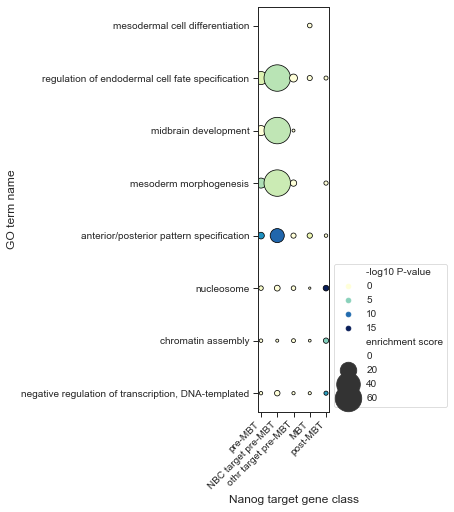

In [224]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):

    fig, ax = plt.subplots(figsize=(6.4 * 1, 4.8 * 1.5))
    sns.scatterplot(
        x='sample',
        y='name',
        size='enrichment score',
        hue='-log10 P-value',
        data=GO_cluster,
        palette='YlGnBu',
        sizes=(0, 700),
        edgecolor='k',
        ax=ax,
    )
    ax.legend(bbox_to_anchor=(1, 0), loc='lower left')
    ax.set_xticks(range(5))

    ax.set_xticklabels(['pre-MBT', 'NBC target pre-MBT', 'othr target pre-MBT', 'MBT', 'post-MBT',], rotation=45, ha='right')
    ax.set_xlabel('Nanog target gene class')
    ax.set_ylabel('GO term name')
    fig.tight_layout()
    fig_name = 'Fig4C'
    fig.savefig(f'/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/figures/{fig_name}_Scatterplot_GO_results_{tss_bin}.pdf', transparent=True)
